## Data set

In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/final-data/recent_data.csv
/kaggle/input/final-data/old_data.csv


The dataset is the consists of airline data set in .xlxs form. The first task is to read the dataframe and look inspect the data.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sea
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, plot_confusion_matrix

In [30]:
old_data = pd.read_csv('../input/final-data/old_data.csv')
recent_data = pd.read_csv('../input/final-data/recent_data.csv')

The recommended column in old_data is either "0" or "1" but in the recent_data recommended column is "yes" or "no". Hence changing the recommended column in the old_data to "yes" or "no". Also, the airline names are not uniform. We make them identical to the recent data. 

In [31]:
airline_names = sorted(recent_data['airline'].unique())
airline_names
a = sorted(old_data['airline'].unique())
a

r = []

for row in recent_data.itertuples():
    if row.recommended == "yes":
        r.append(1)
    elif row.recommended == "no":
        r.append(0)

recent_data['recommended'] = r


a = []

for row in old_data.itertuples():
    if row.airline == 'air-india':
        a.append('Air India')
    elif row.airline == 'american-airlines':
        a.append('American Airlines')
    elif row.airline == 'delta-air-lines':
        a.append('Delta Air Lines')
    elif row.airline == 'klm-royal-dutch-airlines':
        a.append('KLM Royal Dutch Airlines')
    elif row.airline == 'southwest-airlines':
        a.append('Southwest Airlines')
    elif row.airline == 'united-airlines':
        a.append('United Airlines')
        
old_data['airline'] = a
old_data.head()

,airline,author,author_country,content,cabin_flown,overall_rating,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,Year,recommended
0,Air India,Anzaar Khan,India,"Legroom comfortable, cabin very quiet and LED ...",Economy,9,5,5,4,3,5,7,2015,1
1,Air India,Ranjit Pradhan,United States,The positives: The Dreamliner is an excellent ...,Business Class,7,5,5,5,3,4,7,2015,1
2,Air India,Mike Halpenny,New Zealand,Flight of 9 hours from Delhi to London on 777-...,Economy,8,5,4,4,3,4,7,2015,1
3,Air India,Mike Halpenny,New Zealand,Evening flight from Heathrow on Air India 777-...,Economy,8,5,4,4,3,4,7,2015,1
4,Air India,Mike Halpenny,New Zealand,Air India Dreamliner from Delhi to Melbourne p...,Economy,8,4,4,4,3,4,7,2015,1


In [32]:
recent_data['seat_comfort'] = recent_data['seat_comfort'].fillna(recent_data["seat_comfort"].mean())
recent_data['cabin_service'] = recent_data['cabin_service'].fillna(recent_data["cabin_service"].mean())
recent_data['food_bev'] = recent_data['food_bev'].fillna(recent_data["food_bev"].mean())
recent_data['entertainment'] = recent_data['entertainment'].fillna(recent_data["entertainment"].mean())
recent_data['ground_service'] = recent_data['ground_service'].fillna(recent_data["ground_service"].mean())
recent_data['value_for_money'] = recent_data['value_for_money'].fillna(recent_data["value_for_money"].mean())

The below a sampled database taken for KLM,American Airlines,Delta Airlines,United Airlines,Southwest Airlines and Air India.

In [33]:
recent_data.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,KLM Royal Dutch Airlines,1.0,J Gansen,9th May 2019,✅ Trip Verified | Helsinki to Amsterdam. My fi...,Boeing 737-300,Solo Leisure,Business Class,Helsinki to Amsterdam,May-19,1.0,1.0,1.000000,1.0000,1.0,1.0,0
1,KLM Royal Dutch Airlines,1.0,P Sallis,9th May 2019,✅ Trip Verified | Montreal to Amsterdam. Horri...,A330,Couple Leisure,Business Class,Montreal to Amsterdam,August 2018,1.0,3.0,4.000000,1.0000,5.0,1.0,0
2,KLM Royal Dutch Airlines,9.0,T Henry,8th May 2019,✅ Trip Verified | My partner and I were travel...,NaN,Couple Leisure,Economy Class,Rome to Edinburgh via Amsterdam,May-19,4.0,5.0,4.000000,2.4503,4.0,5.0,1
3,KLM Royal Dutch Airlines,7.0,Dan Grew,8th May 2019,✅ Trip Verified | I am a fairly regular and sa...,Boeing 737-800,Family Leisure,Business Class,Amsterdam to Malaga,April 2019,3.0,3.0,3.000000,2.4503,4.0,3.0,1
4,KLM Royal Dutch Airlines,1.0,Alistair Shearing,7th May 2019,✅ Trip Verified | Bristol to Prague via Amster...,NaN,Family Leisure,Economy Class,Bristol to Prague via Amsterdam,February 2019,4.0,4.0,2.517791,2.4503,1.0,1.0,0


## Visualization

Counting the number of reviews for each data airline.

In [34]:
# Counting the number reviews for each category
count = old_data.groupby(['airline']).size().reset_index()
count.rename(columns={0: 'count'}, inplace=True)

In [35]:
count

,airline,count
0,Air India,289
1,American Airlines,579
2,Delta Air Lines,367
3,KLM Royal Dutch Airlines,344
4,Southwest Airlines,10
5,United Airlines,803


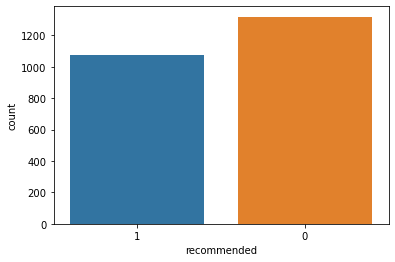

In [36]:
sea.countplot(x='recommended',data=old_data,order=[1,0])
plot.show()

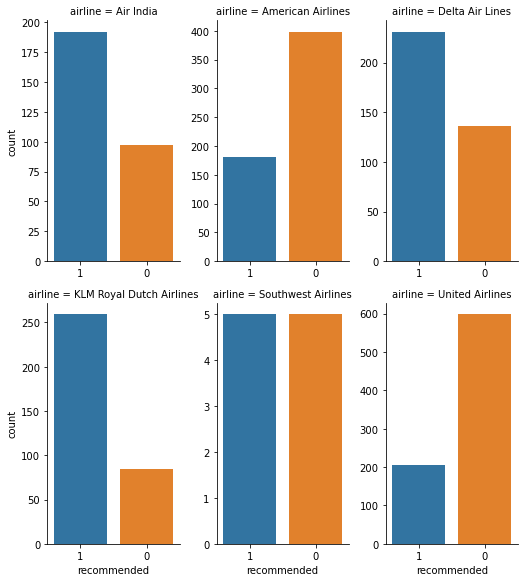

In [37]:
sea.catplot(x = 'recommended',data=old_data,
               order = [1,0],kind = 'count',col_wrap=3,col='airline',
            height=4,aspect=0.6,sharex=False,sharey=False)
plot.show()

## Classifiers

Starting with naive bayes classifier. We train the classifer with the old_data and test it with recent_data. This is because we technically get the old_data first then the recent_data. If we want to use an online classifer, then the data will be given in chronological order.

### Naive Bayes classifier

In [38]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

raw_nb_pipe = Pipeline(steps = [('Vectorizer', CountVectorizer()),('Classifier', MultinomialNB())])

raw_nb_fit = raw_nb_pipe.fit(old_data['content'], old_data['recommended'])

recommendation_pred = raw_nb_fit.predict(recent_data['customer_review'])

In [39]:
from sklearn import metrics
print(metrics.classification_report(recent_data['recommended'], recommendation_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6386
           1       0.86      0.75      0.80      3093

    accuracy                           0.88      9479
   macro avg       0.87      0.84      0.86      9479
weighted avg       0.88      0.88      0.88      9479



### SVM Classifier

In [40]:
raw_svm_pipe = Pipeline(steps = [('Vectorizer', TfidfVectorizer()),('clf', SVC())])

raw_svm_fit = raw_svm_pipe.fit(old_data['content'], old_data['recommended'])

recommendation_pred = raw_svm_fit.predict(recent_data['customer_review'])

In [41]:
print(metrics.classification_report(recent_data['recommended'], recommendation_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      6386
           1       0.95      0.79      0.86      3093

    accuracy                           0.92      9479
   macro avg       0.93      0.89      0.90      9479
weighted avg       0.92      0.92      0.92      9479



## Customized vectoriser

### Building a Vectorizer that extracts the alphabetical lemma with length > 3

In [42]:
import spacy
import numpy as np

nlp = spacy.load('en_core_web_sm')

In [43]:
def preprocess(text):
    filtered_tokens = []
    for token in nlp(text):
        if token.is_stop == False:
            filtered_tokens.append(token.lemma_)
            #print(token.pos_)
    return [token for token in filtered_tokens if token.isalpha() if len(token)>3]

In [44]:
# Custom vectorizer
vectorizer = CountVectorizer()
vectorizer.tokenizer = preprocess

### Naive Bayes

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Making a custom pipeline 
pp_nb_pipe = Pipeline(steps=[('custom', vectorizer),('mnb', MultinomialNB())])

# Fitting the pipe line
preprocessed_nb_fit = pp_nb_pipe.fit(old_data['content'], old_data['recommended'])

In [46]:
# Predicting with the fitted pipe
recommendation_pred1 = preprocessed_nb_fit.predict(recent_data['customer_review'])

In [47]:
print(metrics.classification_report(recent_data['recommended'], recommendation_pred1))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      6386
           1       0.83      0.78      0.81      3093

    accuracy                           0.88      9479
   macro avg       0.87      0.85      0.86      9479
weighted avg       0.88      0.88      0.88      9479



### SVM classifier

In [48]:
pp_svm_pipe = Pipeline(steps=[('custom', vectorizer),('clf', SVC())])

# Fitting the pipe line
processed_svm_fit = pp_svm_pipe.fit(old_data['content'], old_data['recommended'])

# Predicting with the fitted pipe
recommendation_pred1svm = processed_svm_fit.predict(recent_data['customer_review'])

print(metrics.classification_report(recent_data['recommended'], recommendation_pred1svm))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6386
           1       0.92      0.78      0.85      3093

    accuracy                           0.91      9479
   macro avg       0.91      0.88      0.89      9479
weighted avg       0.91      0.91      0.91      9479



### Part of Speech tagging

Retain the parts of speech that are most valueble for determining the emotion of the classification.

In [49]:
def preprocess2(text):
    filtered_tokens = []
    for token in nlp(text):
        if token.is_stop==False and (token.pos_== 'ADJ' or token.pos_== 'ADV' or token.pos_=="VERB") :
            filtered_tokens.append(token.lemma_)
            #print(token.pos_)
    return [token for token in filtered_tokens if token.isalpha() if len(token)>3]

In [50]:
# Custom vectorizer
vectorizer1 = CountVectorizer()
vectorizer1.tokenizer = preprocess2

### Naive Bayes

In [51]:
#Making a custom pipeline 
pp2_nb_pipe = Pipeline(steps=[('custom', vectorizer1),('mnb', MultinomialNB())])

# Fitting the pipe line
processed2_nb_fit = pp2_nb_pipe.fit(old_data['content'], old_data['recommended'])

In [52]:
# Predicting with the fitted pipe
recommendation_pred2 = processed2_nb_fit.predict(recent_data['customer_review'])

In [53]:
print(metrics.classification_report(recent_data['recommended'], recommendation_pred2))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      6386
           1       0.84      0.83      0.84      3093

    accuracy                           0.90      9479
   macro avg       0.88      0.88      0.88      9479
weighted avg       0.90      0.90      0.90      9479



### SVM

In [54]:
pp2_svm_pipe = Pipeline(steps=[('custom', vectorizer1),('clf', SVC())])

# Fitting the pipe line
processed2_svm_fit = pp2_svm_pipe.fit(old_data['content'], old_data['recommended'])

# Predicting with the fitted pipe
recommendation_pred2svm = processed2_svm_fit.predict(recent_data['customer_review'])

print(metrics.classification_report(recent_data['recommended'], recommendation_pred2svm))

              precision    recall  f1-score   support

           0       0.91      0.97      0.93      6386
           1       0.92      0.79      0.85      3093

    accuracy                           0.91      9479
   macro avg       0.91      0.88      0.89      9479
weighted avg       0.91      0.91      0.91      9479



## Bert Transformer

In [55]:
!pip install transformers==3

     |████████████████████████████████| 754 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 5.9 MB/s eta 0:00:01
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.9.4
    Uninstalling tokenizers-0.9.4:
      Successfully uninstalled tokenizers-0.9.4
  Attempting uninstall: transformers
    Found existing installation: transformers 4.2.2
    Uninstalling transformers-4.2.2:
      Successfully uninstalled transformers-4.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
allennlp 2.0.1 requires transformers<4.3,>=4.1, but you have transformers 3.0.0 which is incompatible.


In [56]:
from transformers import BertTokenizer, BertModel, BertConfig

# Loading Bert tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Tokenizing the reviews and mapping them to the word IDs
def tokenize(reviews):  
    input_ids = []
    max_len = 512
    for review in reviews:
        input_ids.append(tokenizer.encode(review,add_special_tokens = True))
    return input_ids

# Train data

print('Original: ', old_data['content'][0])

train_input_ids = tokenize(old_data['content'])
print('Token IDs:', train_input_ids[0])

# Test data

print('Original: ', recent_data['customer_review'][0])

test_input_ids = tokenize(recent_data['customer_review'])
print('Token IDs:', test_input_ids[0])

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Original:  Legroom comfortable, cabin very quiet and LED lighting gives a great feel. Charging and USB socket on every seat very helpful. The crew were smiling and courteous, and food extremely good. Best service to date with Air India, except for the immigrations and customs in Delhi which could be done directly in Bangalore.
Token IDs: [101, 4190, 9954, 6625, 1010, 6644, 2200, 4251, 1998, 2419, 7497, 3957, 1037, 2307, 2514, 1012, 13003, 1998, 18833, 22278, 2006, 2296, 2835, 2200, 14044, 1012, 1996, 3626, 2020, 5629, 1998, 2457, 14769, 1010, 1998, 2833, 5186, 2204, 1012, 2190, 2326, 2000, 3058, 2007, 2250, 2634, 1010, 3272, 2005, 1996, 7521, 2015, 1998, 8205, 1999, 6768, 2029, 2071, 2022, 2589, 3495, 1999, 14022, 1012, 102]
Original:  ✅ Trip Verified | Helsinki to Amsterdam. My first experience with KLM was about 2 years ago ( AMS-Malaga & return ) and it was horrible. On May 1 I was re-booked by Finnair to fly with KLM due to a delayed flight from BKK. On board food was tasteless plu

In [57]:
print('Max sentence length: ', max([len(review) for review in old_data['content']]))
print('Max sentence length: ', max([len(review) for review in recent_data['customer_review']]))

Max sentence length:  3178
Max sentence length:  3568


In [58]:
from keras.preprocessing.sequence import pad_sequences
MAX_LEN = 512
print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)
print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

# Pad our input tokens with value 0.
# "post" indicates that we want to pad and truncate at the end of the sequence,
# as opposed to the beginning.
train_input_ids = pad_sequences(train_input_ids, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")

test_input_ids = pad_sequences(test_input_ids, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")

print('\Done.')


Padding/truncating all sentences to 512 values...

Padding token: "[PAD]", ID: 0
\Done.


In [59]:
# Indicating BERT the location of the token and a padding 

def mask(input_ids):
    attention_masks = []
    
    for word in input_ids:

        att_mask = [int(token_id > 0) for token_id in word]
      
        attention_masks.append(att_mask)
    return attention_masks

train_input_masks = mask(train_input_ids)
test_input_masks = mask(test_input_ids)

In [60]:
from sklearn.model_selection import train_test_split
# Use 90% for training and 10% for validation.
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(train_input_ids,old_data['recommended'], 
                                                            random_state=2021, test_size=0.1)
# Do the same for the attention masks.
train_masks, validation_masks, _, _ = train_test_split(train_input_masks, old_data['recommended'],
                                             random_state=2021, test_size=0.1)

In [61]:
# Convert all inputs and labels into torch tensors

import torch

train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)


train_labels = torch.tensor(train_labels.to_list())
validation_labels = torch.tensor(validation_labels.to_list())

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [62]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Choosing a batch size of 6
batch_size = 6

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [63]:
import torch.nn as nn
class BertClassifier(nn.Module):
    
    def __init__(self, n_classes = 2):
        super(BertClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(768, n_classes)
        self.softmax = nn.Softmax(dim=1)
  
    def forward(self, input_ids, attention_mask):
        
        _, pooled_output = self.bert(
        input_ids=input_ids,
        attention_mask=attention_mask
    )
        output = self.drop(pooled_output)
        #print(torch.max(output,dim = 1))
        return self.out(output)

In [64]:
from torch.optim import Adam
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

torch.cuda.empty_cache() 

In [65]:
# Asiging model to GPU

model = BertClassifier()
model = model.to(device)

Downloading:   0%|          | 0.00/433 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [66]:
EPOCHS = 4
 
optimizer = Adam(model.parameters(), lr=3e-6)
total_steps = len(train_dataloader) * EPOCHS
loss_fn = nn.CrossEntropyLoss().to(device)


In [67]:
from torch.nn.utils import clip_grad_norm_
from IPython.display import clear_output
for epoch_num in range(EPOCHS):
    model.train()
    train_loss = 0
    for step_num, batch_data in enumerate(train_dataloader):
        token_ids, masks, targets = tuple(t.to(device).long() for t in batch_data)
        
        outputs = model(
      token_ids,
      masks)
        
        targets = targets.reshape((1,len(targets)))

        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, targets[0])

        train_loss += loss.item()
        
        
        model.zero_grad()
        loss.backward()
        

        clip_grad_norm_(parameters=model.parameters(), max_norm=1.0)
        optimizer.step()
        
        clear_output(wait=True)
        print('Epoch: ', epoch_num + 1)
        print("\r" + "{0}/{1} loss: {2} ".format(step_num, len(train_data) / batch_size, train_loss / (step_num + 1)))

Epoch:  4
358/358.6666666666667 loss: 0.17186089467502413 


In [68]:

model.eval()
bert_predicted = []
with torch.no_grad():
    for step_num, batch_data in enumerate(validation_dataloader):
        token_ids, masks, targets = tuple(t.to(device).long() for t in batch_data)

        outputs = model(
      token_ids,
      masks
    )
        
        targets = targets.reshape((1,len(targets)))

        _, preds = torch.max(outputs, dim=1)
        bert_predicted.append(preds)
    
pred = []
for i in range(len(bert_predicted)):
    for j in range(len(bert_predicted[i])):
        pred.append(bert_predicted[i][j])
    
pred = torch.tensor(pred).numpy()

In [69]:
print("Classification Report for BERT BASE UNCASED model\n\n",classification_report(validation_labels, pred))

Classification Report for BERT BASE UNCASED model

               precision    recall  f1-score   support

           0       0.91      0.94      0.93       124
           1       0.94      0.91      0.92       116

    accuracy                           0.93       240
   macro avg       0.93      0.92      0.92       240
weighted avg       0.93      0.93      0.92       240



## Logistic Regression

For this, we design a linear regresssor that takes in other features in the dataset and presdicts the label "recommended" using logical regression.

In [70]:
model = LogisticRegression(solver='liblinear', random_state=0)
x = old_data[old_data.columns[6:12]]
y = old_data['recommended']
model = model.fit(x, y)
model.score(x,y)

0.9289297658862876

In [71]:
model.coef_[0]

array([ 0.37944775,  0.84714134,  0.20727591,  0.1672506 ,  1.2591592 ,
       -0.02164554])

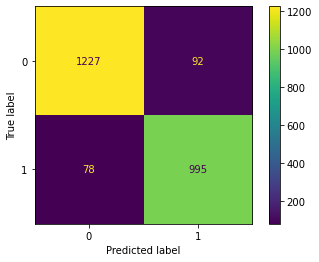

In [72]:
pred_y = model.predict(x)
plot_confusion_matrix(model, x,y,labels=model.classes_)
plot.show()

In [73]:
print(classification_report(y, pred_y))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1319
           1       0.92      0.93      0.92      1073

    accuracy                           0.93      2392
   macro avg       0.93      0.93      0.93      2392
weighted avg       0.93      0.93      0.93      2392



In [74]:
test_x = recent_data[recent_data.columns[10:16]]
test_y = recent_data['recommended']
test_pred_y = model.predict(test_x)
print(classification_report(test_y, test_pred_y))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      6386
           1       0.90      0.81      0.85      3093

    accuracy                           0.91      9479
   macro avg       0.90      0.88      0.89      9479
weighted avg       0.91      0.91      0.91      9479



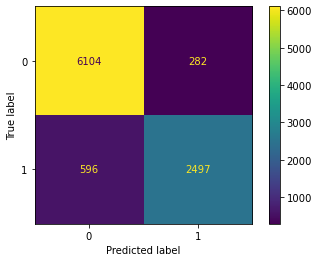

In [75]:
plot_confusion_matrix(model,test_x,test_y,labels=model.classes_)
plot.show()

# Ensemble methods

In [76]:
from sklearn.ensemble import VotingClassifier
models = [('one',raw_nb_fit),('2',raw_svm_fit),
          ('3',pp_nb_pipe),('4',pp_svm_pipe),
          ('5',pp2_nb_pipe),('6',pp2_svm_pipe)]

ensemble = VotingClassifier(estimators=models)

# Fitting the ensemble model
ensemble_model = ensemble.fit(old_data['content'], old_data['recommended'])

# predicting the ensemble model
recommendation_pred2svm = ensemble_model.predict(recent_data['customer_review'])

# Printing the performance metrics
print(metrics.classification_report(recent_data['recommended'], recommendation_pred2svm))


              precision    recall  f1-score   support

           0       0.90      0.97      0.94      6386
           1       0.93      0.79      0.85      3093

    accuracy                           0.91      9479
   macro avg       0.92      0.88      0.90      9479
weighted avg       0.91      0.91      0.91      9479

